# JupyLabBook @ SIRIUS

In [1]:
__version__ = '2.0'
print("JupyLabBook version: %s"%__version__)
print("More info on: %s"%"https://github.com/ArnaudHemmerle/JupyLabBook")

# import custom libraries
import lib.frontend as FE
from lib.extraction.common import PyNexus as PN
from lib.extraction import GIXD as GIXD
from lib.extraction import GIXS as GIXS
from lib.extraction import PilatusSum as PilatusSum


#import useful libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, Javascript, display

# necessary for plotting in the notebook
%matplotlib inline

# to avoid having a large notebook
set_matplotlib_formats('png', 'pdf')
    
# to have all the cells expanded (not collapsed)
display(Javascript('IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}'))
        
# define the class experiment
class Experiment:
    """
    Class Experiment is used to pass arguments concerning the current experiment only.
    """
    def __init__(self):
        pass

# test if the expt already exists (avoid loosing info when reloading this cell)
try:
    expt.notebook_name
except:
    expt = Experiment() 

# necessary for saving in pdf
expt.notebook_name = 'JupyLabBook.ipynb'

# directory where the data will be saved
expt.working_dir = "working/"

# directory where the nexus files are 
expt.recording_dir = "recording/"

# directory where the logs are
expt.logs_dir = "logs/"   

FE.action.Check_and_init(expt)

JupyLabBook version: 2.0
More info on: https://github.com/ArnaudHemmerle/JupyLabBook


<IPython.core.display.Javascript object>

Data reduction will be saved in the folder:
working/

The original nexus files should be in the folder:
recording/

The log files should be in the folder:
logs/



<IPython.core.display.Javascript object>

### SIRIUS_2020_03_12_0756: continuous_ascan delta -24 -19 100 5

In [ ]:
FE.action.Choose(expt)

In [2]:
FE.action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…

In [ ]:
FE.action.Choose(expt)

### SIRIUS_2019_11_07_00325: tscan 10 10

In [7]:
CF.Extract_GIXS(nxs_filename='SIRIUS_2019_11_07_00325.nxs',working_dir=expt.working_dir, recording_dir=expt.recording_dir,logz=True,wavelength=0.155,thetai=0.002,distance=1000.0,pixel_PONI_x=0.0,pixel_PONI_y=0.0,pixel_size=0.172,qxymin=0.0,qxymax=1.0,qzmin=0.0,qzmax=1.0,show_data_stamps=False,force_gamma_delta=False,fgamma=0.0,fdelta=0.0,verbose=False,absorbers='',cmap='viridis')

NameError: name 'CF' is not defined

In [3]:
images_sum, qxy_approx, qz, integrated_qxy, integrated_qz, qxy_array, qz_array=\
GIXS.Extract(nxs_filename='SIRIUS_2019_11_07_00325.nxs', recording_dir=expt.recording_dir,
             wavelength=0.1208,thetai=0.0,distance=435.5,
             pixel_PONI_x=565.5,pixel_PONI_y=996.5,pixel_size=0.172,
            force_gamma_delta=True, fgamma=0.0, fdelta=11.578,
            show_data_stamps=False, verbose=False)


                                                                                  
 	. No gamma found! gamma = 0 
 	. No delta found! delta = 11.578 


	. Absorbers: rr


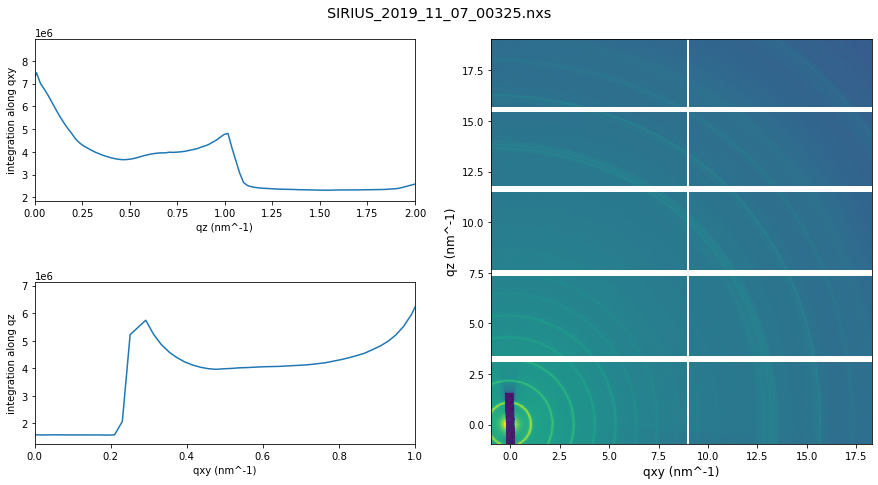

In [4]:
GIXS.Plot(images_sum, qxy_approx, qz,
         integrated_qxy, integrated_qz, qxy_array, qz_array,
         nxs_filename='SIRIUS_2019_11_07_00325.nxs', absorbers='rr', logz=False, cmap='viridis',
         qxymin=0., qxymax=1., qzmin=0., qzmax=2.)

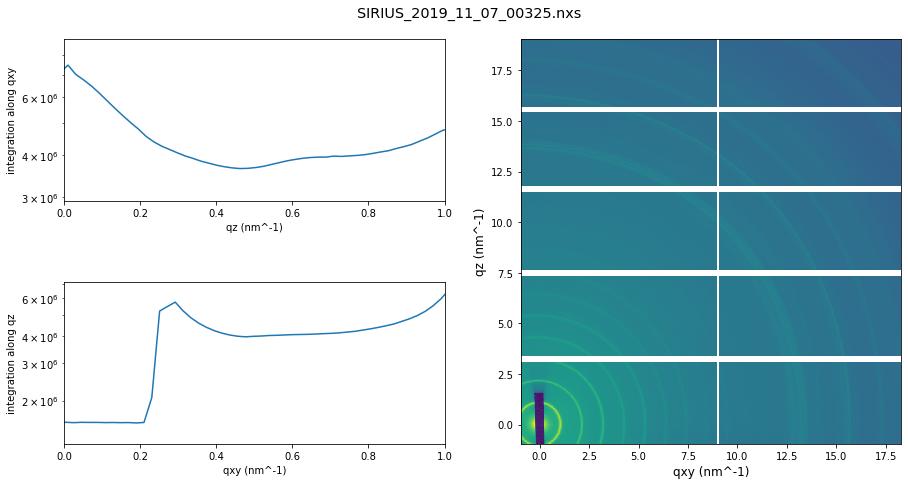

In [5]:
nxs_filename='SIRIUS_2019_11_07_00325.nxs'
recording_dir=expt.recording_dir
wavelength=0.1208
thetai=0.0
distance=435.5
pixel_PONI_x=565.5
pixel_PONI_y=996.5
pixel_size=0.172
force_gamma_delta=True
fgamma=0.0
fdelta=11.578
show_data_stamps=False
verbose=False
logz=True
absorbers=''
cmap='viridis'
qxymin=0.
qxymax=1.
qzmin=0.
qzmax=1.

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from PIL import Image
import os
import sys
    

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(top=0.95)
fig.suptitle(nxs_filename.split('\\')[-1], fontsize='x-large')

# Divide the grid in 2x2
outer = gridspec.GridSpec(2, 2, wspace=0.2)

# Divide the left row in 2x1
inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                subplot_spec=outer[0], hspace=0.5)


#############################################
# Plot a profile along y (integrated over x)
ax1 = fig.add_subplot(inner[0])


if logz: ax1.set_yscale('log')
ax1.set(xlabel = 'qz (nm^-1)', ylabel = 'integration along qxy')

try:
    # Compute best limits
    temp = integrated_qxy[(qz_array<qzmax) & (qzmin<qz_array)]
    qzmin_plot = np.min(temp[temp>0])   
    qzmax_plot = np.max(integrated_qxy[(qz_array<qzmax) & (qzmin<qz_array)])
    ax1.set_xlim(qzmin,qzmax)
    ax1.set_ylim(0.8*qzmin_plot,1.2*qzmax_plot) 
    ax1.plot(qz_array, integrated_qxy)
except:
    # Go back to automatic limits if bad limits given
    ax1.plot(qz_array, integrated_qxy)

###################################################
# Plot a profile along x (integrated over y)
ax2 = fig.add_subplot(inner[1])

if logz: ax2.set_yscale('log')
ax2.set(xlabel = 'qxy (nm^-1)', ylabel = 'integration along qz')

try:
    # Compute best limits
    temp = integrated_qz[(qxy_array<qxymax) & (qxymin<qxy_array)]
    qzmin_plot = np.min(temp[temp>0])   
    qzmax_plot = np.max(integrated_qz[(qxy_array<qxymax) & (qxymin<qxy_array)])  
    ax2.set_xlim(qxymin,qxymax) 
    ax2.set_ylim(0.8*qzmin_plot,1.2*qzmax_plot)    
    ax2.plot(qxy_array, integrated_qz)            
except:
    # Go back to automatic limits if bad limits given
    ax2.plot(qxy_array, integrated_qz) 

#Divide the right row in 1x1
inner = gridspec.GridSpecFromSubplotSpec(1, 1,
                subplot_spec=outer[1], wspace=0.1, hspace=0.1)

#####################################################
# Show the full image integrated over the scan
ax2 = fig.add_subplot(inner[0])

ax2.pcolormesh(qxy_approx, qz, images_sum, cmap = cmap, shading = 'auto',
               norm = colors.LogNorm(), rasterized=True)
ax2.set_xlabel('qxy (nm^-1)', fontsize='large')
ax2.set_ylabel('qz (nm^-1)', fontsize='large')       

plt.show()
plt.close()    

In [2]:
FE.action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…

In [4]:
FE.action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…

In [3]:
FE.action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…

In [4]:
FE.action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…

In [2]:
FE.action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…

In [2]:
FE.action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…